# Load Tensorflow

In [0]:
import tensorflow as tf
#tf.set_random_seed(42)
tf.random.set_seed(55)

# Collect Data

In [5]:
#MNIST Data
(trainX, trainY), (testX,testY)= tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
trainX.shape

(60000, 28, 28)

In [8]:
testX.shape

(10000, 28, 28)

In [9]:
#Number of labels
trainY.shape

(60000,)

In [10]:
testY.shape

(10000,)

In [7]:
trainX[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [12]:
trainY[0]

5

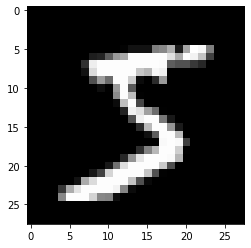

In [13]:
# To print the data
import matplotlib.pyplot as plt
plt.imshow(trainX[0], cmap='gray')

# Convert Output label to multiple values

In [14]:
print(trainY.shape)
print('Samples of trainY :', trainY[0:2])

(60000,)
Samples of trainY : [5 0]


In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)

In [0]:
testY=tf.keras.utils.to_categorical(testY,num_classes=10)

In [19]:
print (trainY.shape)
print('Samples of trainY :', trainY[0:2])

(60000, 10)
Samples of trainY : [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


# Build the Graph

In [0]:
#Initialize Sequential Model
model = tf.keras.models.Sequential()

#Reshape the data from 2D to 1D -> 28x28 to 784
# The equation accepts samples at vectors. Our current input is matrix
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add Dense layer which provides 10 outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

#Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=["accuracy"])

# Execute the graph

In [22]:
model.fit(trainX,trainY, 
          validation_data = (testX,testY),
          epochs = 100,
          batch_size=trainX.shape[0])

Epoch 1/100
1/1 [==============================] - 0s 73ms/step - loss: 0.7898 - accuracy: 0.7839 - val_loss: 0.7287 - val_accuracy: 0.7905
Epoch 2/100
1/1 [==============================] - 0s 72ms/step - loss: 0.7861 - accuracy: 0.7850 - val_loss: 0.7254 - val_accuracy: 0.7911
Epoch 3/100
1/1 [==============================] - 0s 78ms/step - loss: 0.7825 - accuracy: 0.7861 - val_loss: 0.7221 - val_accuracy: 0.7918
Epoch 4/100
1/1 [==============================] - 0s 78ms/step - loss: 0.7790 - accuracy: 0.7870 - val_loss: 0.7188 - val_accuracy: 0.7929
Epoch 5/100
1/1 [==============================] - 0s 77ms/step - loss: 0.7755 - accuracy: 0.7882 - val_loss: 0.7157 - val_accuracy: 0.7933
Epoch 6/100
1/1 [==============================] - 0s 73ms/step - loss: 0.7721 - accuracy: 0.7891 - val_loss: 0.7126 - val_accuracy: 0.7950
Epoch 7/100
1/1 [==============================] - 0s 73ms/step - loss: 0.7687 - accuracy: 0.7902 - val_loss: 0.7095 - val_accuracy: 0.7963
Epoch 8/100
1/1 [===

In [23]:
model.get_weights()

[array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.9999881 , 0.99969023, 0.99901885,
        1.000336  , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.99904764, 1.0002887 , 0.99999523,
        1.0000751 , 0.99997944, 1.0001969 , 0.99979806, 0.9989759 ,
        0.99957514, 1.0004286 , 0.9994485 , 0.99888974, 0.9964599 ,
        1.0000465 , 1.0003792 , 0.9968506 , 0.99896985, 0.99911827,
        0.99937737, 0.99913293, 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.9992362 , 0.99914545,
        0.99794394, 0.9990523 , 1.000314  , 0.99897134, 1.0004442 ,
        0.9980724 , 1.0012416 , 1.0026    , 0.9988819 , 0.9962949 ,
        0.998965  , 0.99831694, 0.99708766, 1.00

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 10,986
Trainable params: 9,418
Non-trainable params: 1,568
_________________________________________________________________
